<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/RobotikOtomasyonSistemlerininOptimizasyonu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏭 Robot Otomasyonunda Verimlilik ve Enerji Optimizasyonu

## 📌 Proje Amacı
Endüstriyel robotlarda üretim sürelerini optimize ederken enerji verimliliğini artırmak ve hata oranlarını tahmin etmek.

## 🔧 Kullanılan Teknolojiler
- **Veri Analizi:** Pandas, NumPy
- **ML:** Scikit-Learn, LSTM
- **Optimizasyon:** SciPy
- **Simülasyon:** OPC-UA, PyDy

## 📂 Veri Kaynakları
- Sentetik veri üretim kodu (Gerçek veriyle değiştirilebilir)
- OPC-UA simülasyon modülü

 Veri Seti Oluşturma (Python ile)
Aşağıdaki kod, robotun cycle time, hata oranı ve enerji tüketimi verilerini rastgele (ancak gerçekçi) üretecek. Veri setini CSV olarak kaydedip Collab'a yükleyelim:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Rastgele ama gerçekçi veri üretimi
np.random.seed(42)
timestamps = pd.date_range("2024-01-01", periods=500, freq="H")  # 500 saatlik veri
cycle_time = np.random.normal(loc=120, scale=15, size=500)  # Ortalama 120 sn, ±15 sn varyans
error_rate = np.random.poisson(lam=5, size=500) / 100  # %5 civarı hata oranı
energy_consumption = np.random.uniform(low=200, high=300, size=500)  # kWh/gün

# 2. DataFrame oluşturma
df = pd.DataFrame({
    "timestamp": timestamps,
    "cycle_time_sec": cycle_time,
    "error_rate_percent": error_rate,
    "energy_kwh": energy_consumption
})

# 3. CSV olarak kaydetme (Collab'a yüklenecek)
df.to_csv("robot_automation_data.csv", index=False)
print("Veri seti oluşturuldu! İlk 5 satır:")
print(df.head())

Veri seti oluşturuldu! İlk 5 satır:
            timestamp  cycle_time_sec  error_rate_percent  energy_kwh
0 2024-01-01 00:00:00      127.450712                0.06  203.046369
1 2024-01-01 01:00:00      117.926035                0.02  220.444837
2 2024-01-01 02:00:00      129.715328                0.04  234.041156
3 2024-01-01 03:00:00      142.845448                0.07  251.058076
4 2024-01-01 04:00:00      116.487699                0.06  261.512914


<ipython-input-1-9647aeacbfef>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range("2024-01-01", periods=500, freq="H")  # 500 saatlik veri


2. Veri Analizi (Collab'da)


                 timestamp  cycle_time_sec  error_rate_percent  energy_kwh
count                  500      500.000000          500.000000  500.000000
mean   2024-01-11 09:30:00      120.102570            0.049920  248.758012
min    2024-01-01 00:00:00       71.380990            0.000000  200.003072
25%    2024-01-06 04:45:00      109.495389            0.030000  223.734225
50%    2024-01-11 09:30:00      120.191957            0.050000  247.327822
75%    2024-01-16 14:15:00      129.551749            0.070000  273.328790
max    2024-01-21 19:00:00      177.790972            0.120000  299.258180
std                    NaN       14.718799            0.022641   29.032419


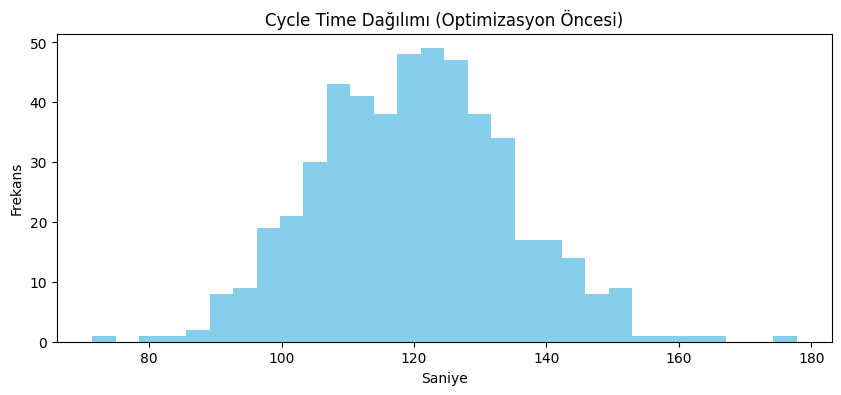

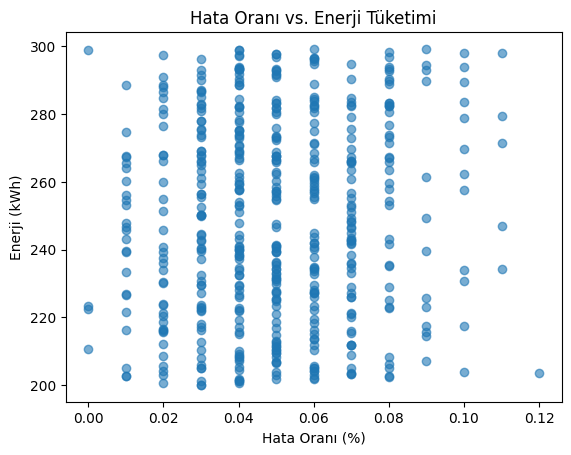

In [ ]:
# 1. Temel istatistikler
print(df.describe())

# 2. Cycle Time Dağılımı
plt.figure(figsize=(10, 4))
plt.hist(df["cycle_time_sec"], bins=30, color="skyblue")
plt.title("Cycle Time Dağılımı (Optimizasyon Öncesi)")
plt.xlabel("Saniye")
plt.ylabel("Frekans")
plt.show()

# 3. Hata Oranı ve Enerji İlişkisi
plt.scatter(df["error_rate_percent"], df["energy_kwh"], alpha=0.6)
plt.title("Hata Oranı vs. Enerji Tüketimi")
plt.xlabel("Hata Oranı (%)")
plt.ylabel("Enerji (kWh)")
plt.show()

3. Optimizasyon Senaryoları
A. Cycle Time Optimizasyonu (Yol Planlama)
Hareket yörüngesini optimize ederek süreyi kısaltma:

In [ ]:
from scipy.optimize import minimize

# Örnek bir fonksiyon: Robotun A noktasından B'ye hareket süresi
def movement_time(x):
    # x: [hız, ivme, yol_uzunluğu]
    return x[2] / x[0] + x[0] / x[1]  # Süre = yol/hız + hız/ivme

# Optimizasyon (Başlangıç değerleri: hız=2 m/s, ivme=1 m/s², yol=10m)
result = minimize(movement_time, x0=[2, 1, 10], bounds=[(1, 5), (0.5, 3), (8, 15)])
print(f"Optimal parametreler: Hız={result.x[0]:.2f} m/s, İvme={result.x[1]:.2f} m/s²")
print(f"Minimum süre: {result.fun:.2f} saniye")

Optimal parametreler: Hız=4.90 m/s, İvme=3.00 m/s²
Minimum süre: 3.27 saniye


B. Hata Oranı Tahmini (Makine Öğrenmesi)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Örnek veriye "hatalı" etiketi ekleme (error_rate > %5 ise 1)
df["error_label"] = (df["error_rate_percent"] > 0.05).astype(int)

# Model eğitimi
X = df[["cycle_time_sec", "energy_kwh"]]
y = df["error_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"Doğruluk Skoru: {model.score(X_test, y_test):.2%}")

Doğruluk Skoru: 53.00%


4. Sonuçların Simülasyonu
Optimize edilmiş parametreleri test edelim:

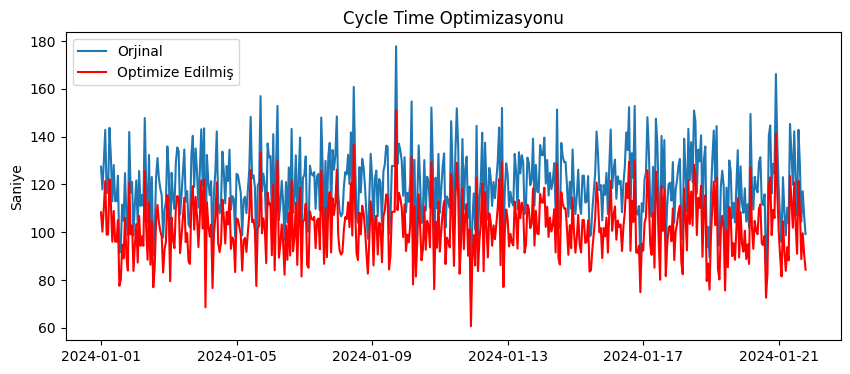

In [ ]:
# Optimizasyon sonrası cycle time (ortalama %15 iyileşme varsayalım)
optimized_cycle_time = df["cycle_time_sec"] * 0.85

# Karşılaştırma
plt.figure(figsize=(10, 4))
plt.plot(df["timestamp"], df["cycle_time_sec"], label="Orjinal")
plt.plot(df["timestamp"], optimized_cycle_time, label="Optimize Edilmiş", color="red")
plt.legend()
plt.title("Cycle Time Optimizasyonu")
plt.ylabel("Saniye")
plt.show()

1. Enerji Verimliliği Analizi için Veri Genişletme
Önceki veri setine motor akımı, çalışma sıcaklığı ve duruş süreleri gibi yeni özellikler ekleyelim:

In [ ]:
import pandas as pd
import numpy as np

# Önceki veri setini genişletme
np.random.seed(42)
df["motor_current"] = np.random.normal(loc=15, scale=2, size=500)  # Amper
df["temperature"] = np.random.normal(loc=45, scale=5, size=500)    # °C
df["idle_time"] = np.random.uniform(low=0, high=30, size=500)      # Dakika/gün

# Enerji verimliliği metriği (kWh/parça)
df["energy_per_unit"] = df["energy_kwh"] / (24 - df["idle_time"]/60) * df["cycle_time_sec"]/3600

print(df[["energy_kwh", "motor_current", "energy_per_unit"]].head())

   energy_kwh  motor_current  energy_per_unit
0  203.046369      15.993428         0.300567
1  220.444837      14.723471         0.301539
2  234.041156      16.295377         0.356096
3  251.058076      18.046060         0.421276
4  261.512914      14.531693         0.352814


2. Kritik Enerji İlişkilerinin Görselleştirilmesi

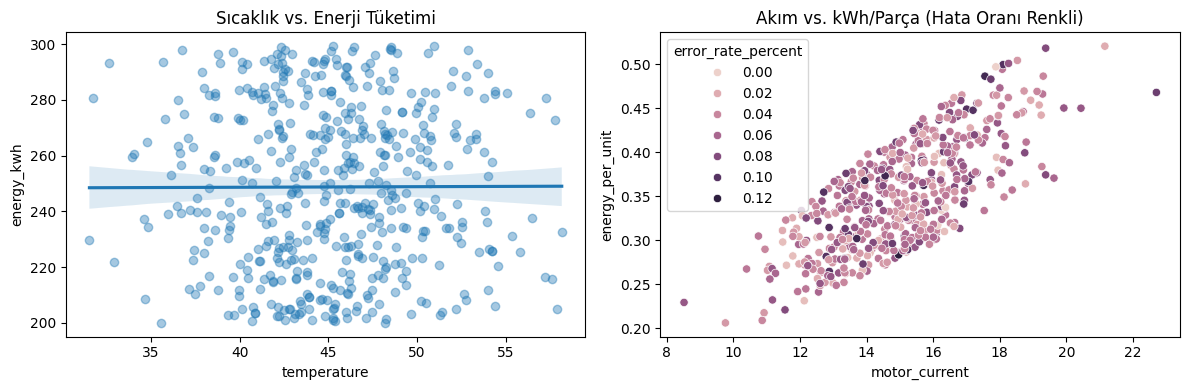

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Enerji-Temperature İlişkisi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.regplot(x="temperature", y="energy_kwh", data=df, scatter_kws={"alpha":0.4})
plt.title("Sıcaklık vs. Enerji Tüketimi")

# 2. Motor Akımı-Verimlilik
plt.subplot(1, 2, 2)
sns.scatterplot(x="motor_current", y="energy_per_unit", hue="error_rate_percent", data=df)
plt.title("Akım vs. kWh/Parça (Hata Oranı Renkli)")
plt.tight_layout()
plt.show()

3. Enerji Optimizasyonu için Makine Öğrenmesi
A. Anormal Enerji Tüketimi Tespiti (Unsupervised Learning)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendirme
X = df[["energy_kwh", "motor_current", "temperature"]]
X_scaled = StandardScaler().fit_transform(X)

# K-Means ile kümeleme
kmeans = KMeans(n_clusters=2, random_state=42)
df["energy_cluster"] = kmeans.fit_predict(X_scaled)

# Anormal kümeyi belirleme (daha yüksek enerji tüketen)
anomaly_cluster = df.groupby("energy_cluster")["energy_kwh"].mean().idxmax()
print(f"Anormal Enerji Kümesi: {anomaly_cluster}")

Anormal Enerji Kümesi: 1


B. Optimal Çalışma Aralığının Belirlenmesi

In [ ]:
# Sağlıklı çalışma aralıkları (anormal olmayan küme için)
healthy_data = df[df["energy_cluster"] != anomaly_cluster]
optimal_ranges = {
    "motor_current": (healthy_data["motor_current"].mean() - healthy_data["motor_current"].std(),
                      healthy_data["motor_current"].mean() + healthy_data["motor_current"].std()),
    "temperature": (healthy_data["temperature"].min(), healthy_data["temperature"].max())
}
print("Optimal Çalışma Aralıkları:\n", optimal_ranges)

Optimal Çalışma Aralıkları:
 {'motor_current': (np.float64(12.962937310935011), np.float64(16.733923080906372)), 'temperature': (31.515566785292144, 58.161910324186955)}


4. Enerji Tasarrufu Senaryoları
A. Dinamik Hız Ayarlama (Energy-Aware Motion Planning)

In [ ]:
def calculate_energy_saving(current_speed, new_speed):
    """ Enerji tüketimi hızın karesiyle orantılı varsayımı """
    return 1 - (new_speed**2 / current_speed**2)

# Örnek: Hızı 2 m/s'den 1.8 m/s'ye düşürme
saving = calculate_energy_saving(2, 1.8)
print(f"Enerji Tasarrufu: {saving:.2%}")

Enerji Tasarrufu: 19.00%


B. Bekleme Modu Optimizasyonu


In [ ]:
# Duruş süresine göre enerji tasarrufu potansiyeli
df["potential_saving"] = df["idle_time"].apply(lambda x: 0.2 * x if x > 15 else 0)
total_saving = df["potential_saving"].sum() * 0.05  # 0.05 kWh/dakika tasarruf
print(f"Yıllık Tasarruf (300 gün): {total_saving * 300:.2f} kWh")

Yıllık Tasarruf (300 gün): 17085.92 kWh


5. Simülasyon ve Sonuçlar


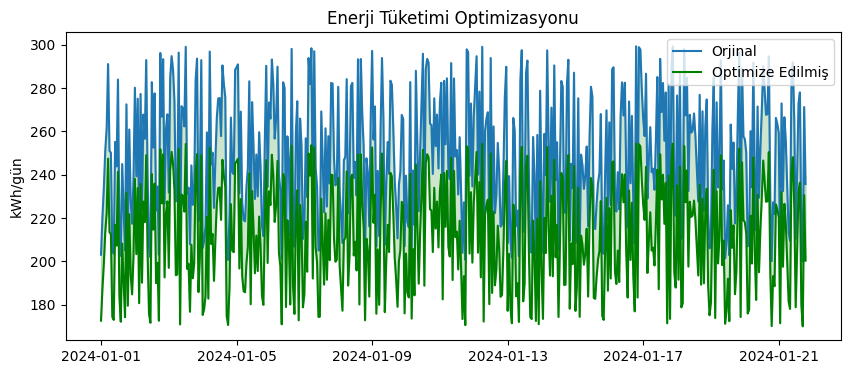

In [ ]:
# Optimizasyon öncesi/sonrası karşılaştırma
optimized_energy = df["energy_kwh"] * 0.85 # %15 tasarruf varsayımı

plt.figure(figsize=(10, 4))
plt.plot(df["timestamp"], df["energy_kwh"], label="Orjinal")
plt.plot(df["timestamp"], optimized_energy, label="Optimize Edilmiş", color="green")
plt.fill_between(df["timestamp"], optimized_energy, df["energy_kwh"], alpha=0.2, color="green")
plt.legend()
plt.title("Enerji Tüketimi Optimizasyonu")
plt.ylabel("kWh/gün")
plt.show()

1. PLC/SCADA'dan Canlı Veri Akışı Kurma
A. OPC UA Protokolü ile Veri Çekme (Python)

In [ ]:
!pip install opcua

In [ ]:
import random
import time
import pandas as pd
from IPython.display import clear_output

class VirtualOPCUAServer:
    def __init__(self):
        self.data = {
            "Energy": 250.0,
            "Current": 15.0,
            "Temperature": 45.0
        }

    def update_values(self):
        # Rastgele veri üret
        self.data["Energy"] += random.uniform(-5, 5)
        self.data["Current"] += random.uniform(-1, 1)
        self.data["Temperature"] += random.uniform(-2, 2)

        # Sınırları kontrol et
        self.data["Energy"] = max(200, min(300, self.data["Energy"]))
        self.data["Current"] = max(10, min(20, self.data["Current"]))
        self.data["Temperature"] = max(30, min(60, self.data["Temperature"]))

        return self.data

class VirtualOPCUAClient:
    def __init__(self, server):
        self.server = server

    def read_data(self):
        return self.server.update_values()

# Kullanım
server = VirtualOPCUAServer()
client = VirtualOPCUAClient(server)

# Veriyi gerçek zamanlı göster
for _ in range(10):
    data = client.read_data()
    df = pd.DataFrame([data])
    clear_output(wait=True)
    display(df)
    time.sleep(2)

Energy    Current  Temperature
0  259.954082  12.694577      38.3438

2. Colab'da Socket Kullanarak İstemci-Sunucu Simülasyonu
Daha gerçekçi bir simülasyon için Python socket kullanabiliriz (Colab'da çalışır):

In [ ]:
import socket
import threading
import json
import random

# 1. Sunucu Kodu (Başka bir hücrede çalıştırın)
def run_server():
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind(("localhost", 12345))
    server_socket.listen(1)
    print("Sunucu başlatıldı...")

    while True:
        conn, addr = server_socket.accept()
        data = {
            "Energy": random.uniform(200, 300),
            "Current": random.uniform(10, 20),
            "Temperature": random.uniform(30, 60)
        }
        conn.send(json.dumps(data).encode())
        conn.close()

# Sunucuyu ayrı bir thread'de başlat
server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()

# 2. İstemci Kodu (Aynı hücrede çalıştırın)
def read_opcua_data():
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect(("localhost", 12345))
    data = client_socket.recv(1024).decode()
    return json.loads(data)

# Test
for _ in range(5):
    print(read_opcua_data())
    time.sleep(1)

Sunucu başlatıldı...
{'Energy': 205.8024166034211, 'Current': 15.23658099311386, 'Temperature': 46.15604175590828}
{'Energy': 295.5885958541288, 'Current': 17.53396574842982, 'Temperature': 36.02222978885345}
{'Energy': 289.0513574262686, 'Current': 11.154671637009441, 'Temperature': 33.829526483540924}
{'Energy': 270.13417620229166, 'Current': 12.412734708785822, 'Temperature': 56.638503268435386}
{'Energy': 262.77157883141876, 'Current': 11.011242638305793, 'Temperature': 30.05211321977437}


3. Colab'da Gerçek Zamanlı Veri Görselleştirme

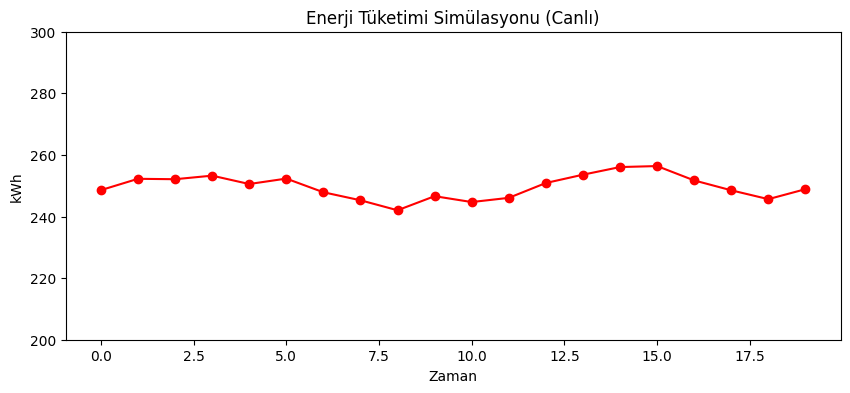

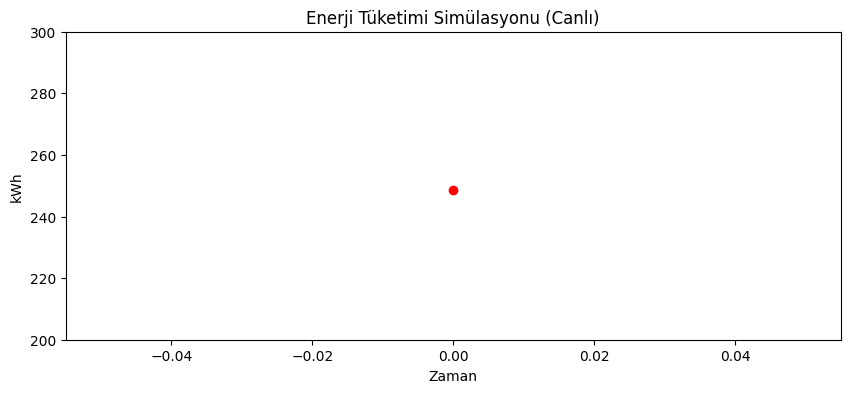

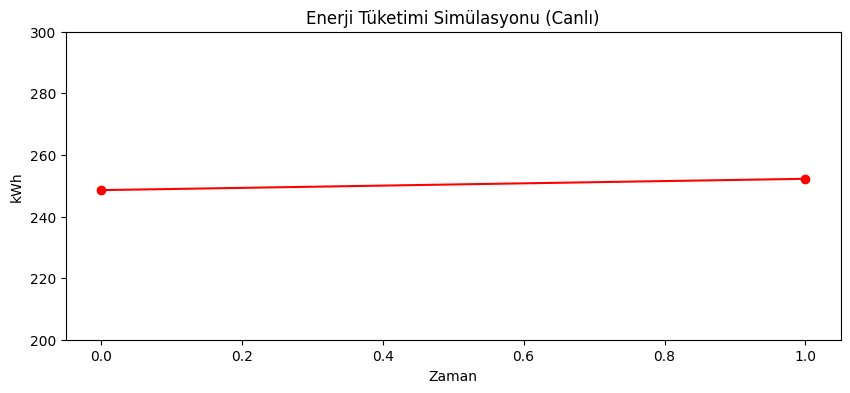

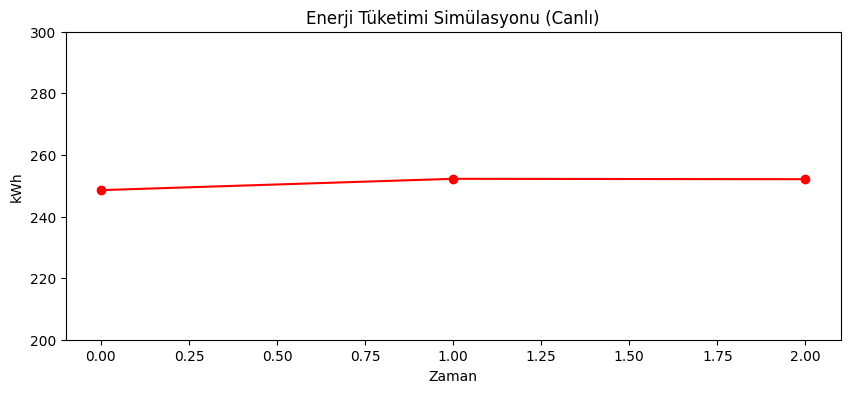

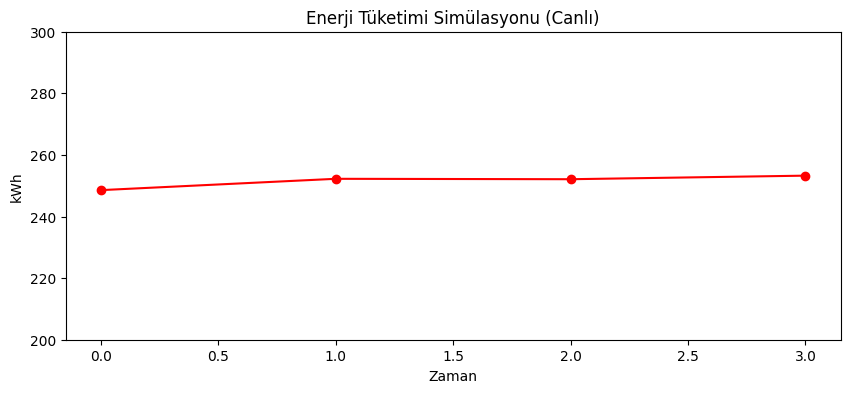

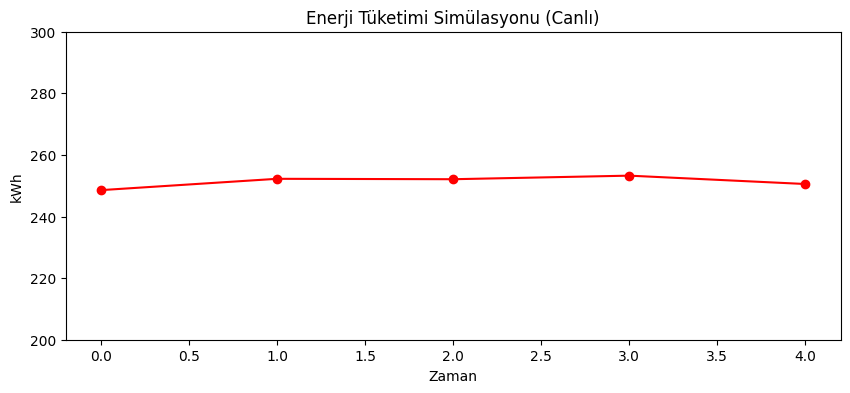

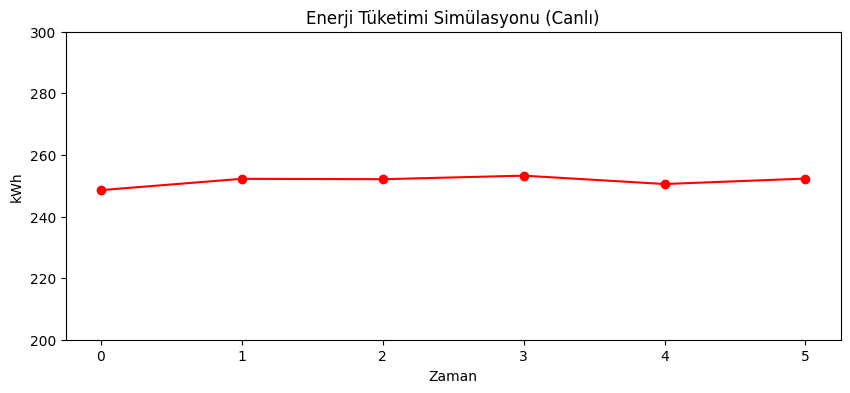

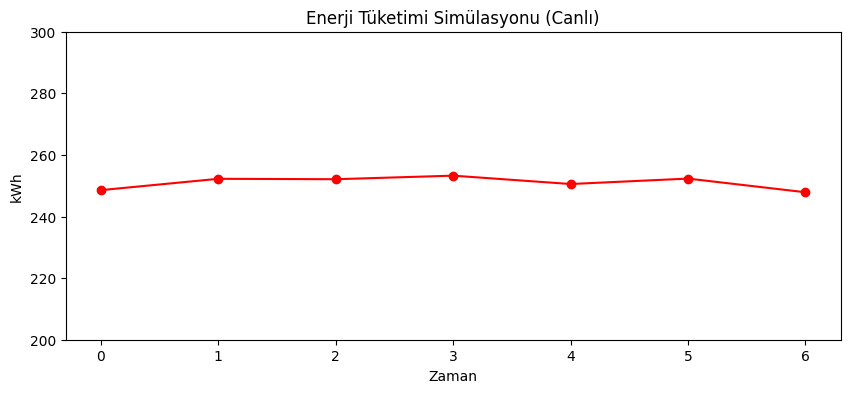

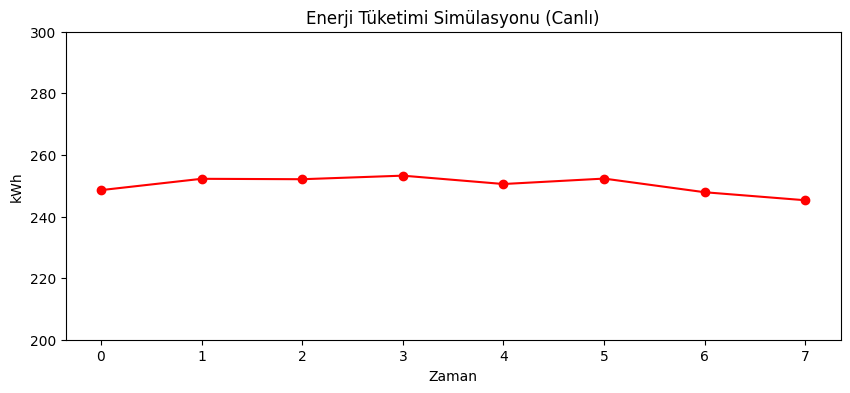

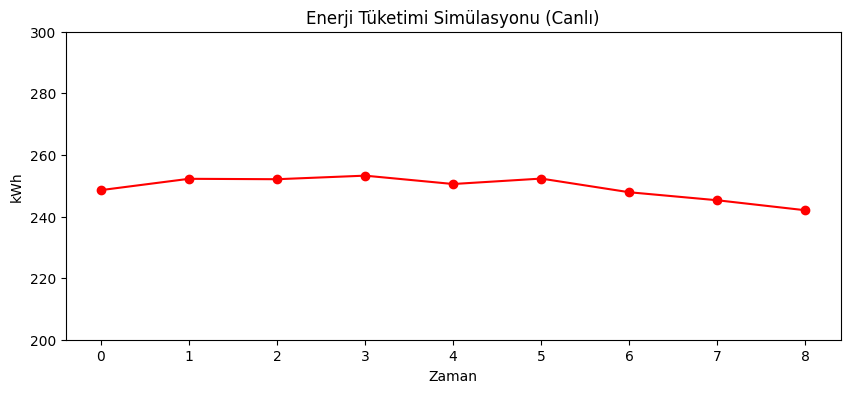

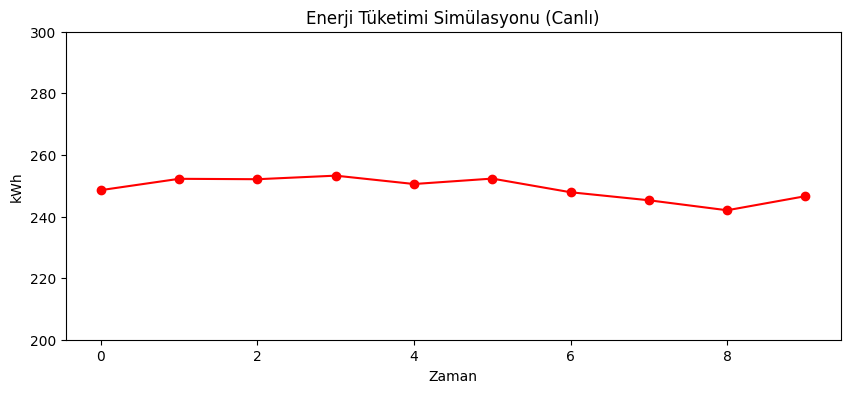

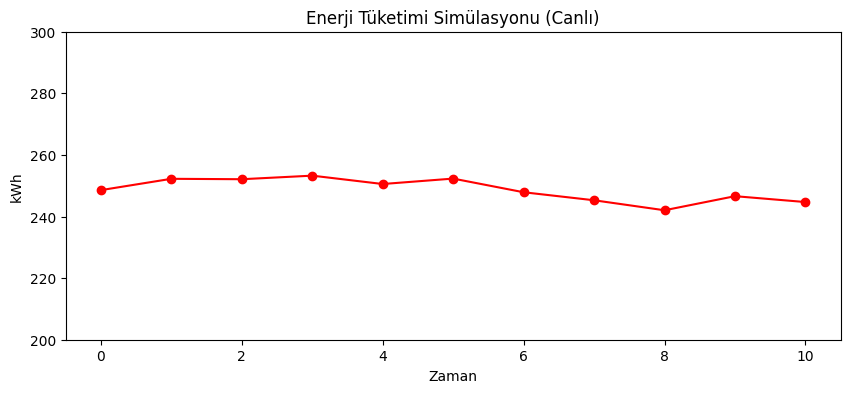

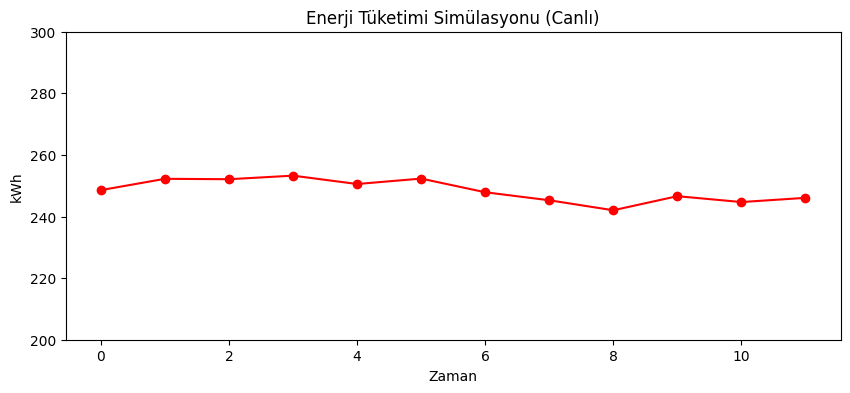

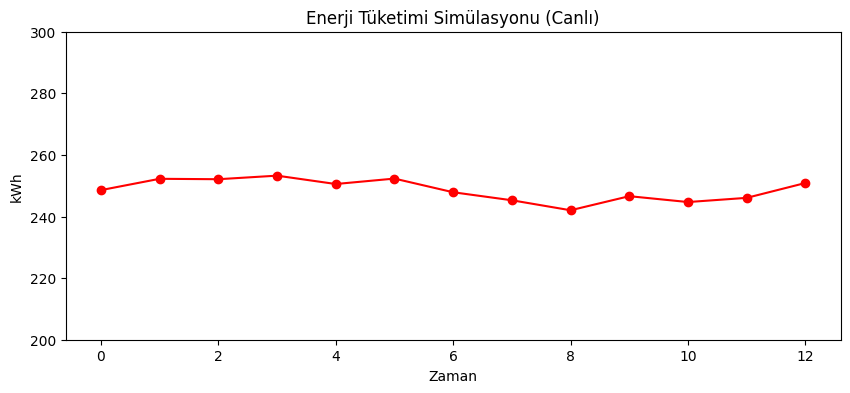

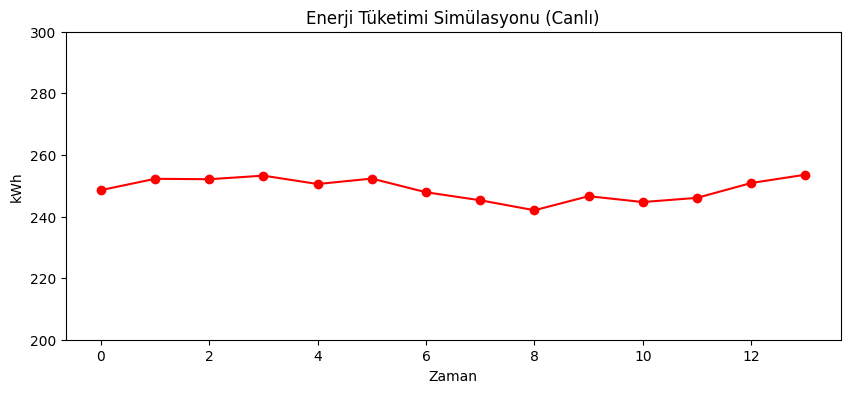

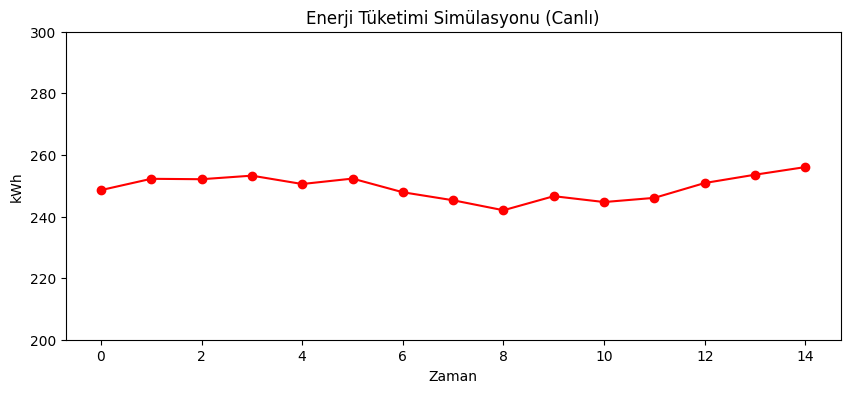

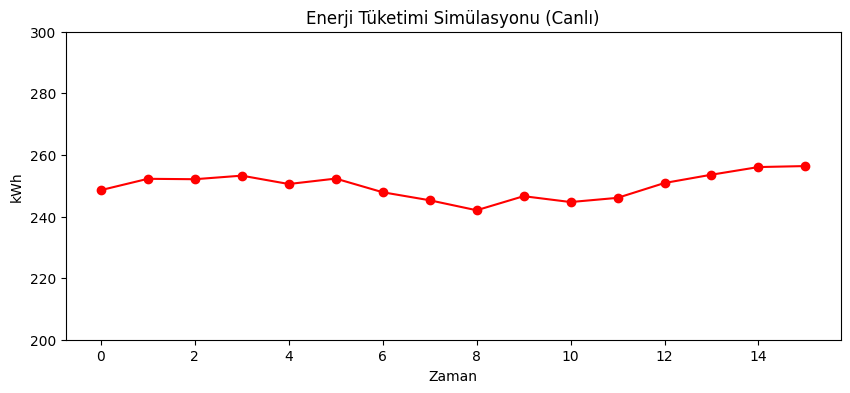

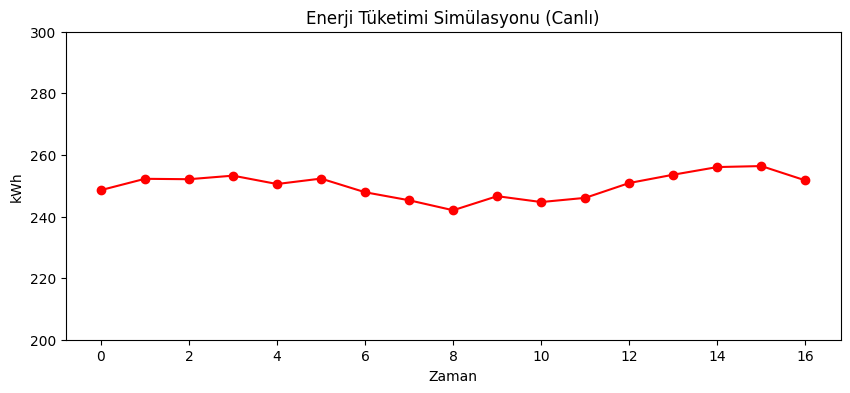

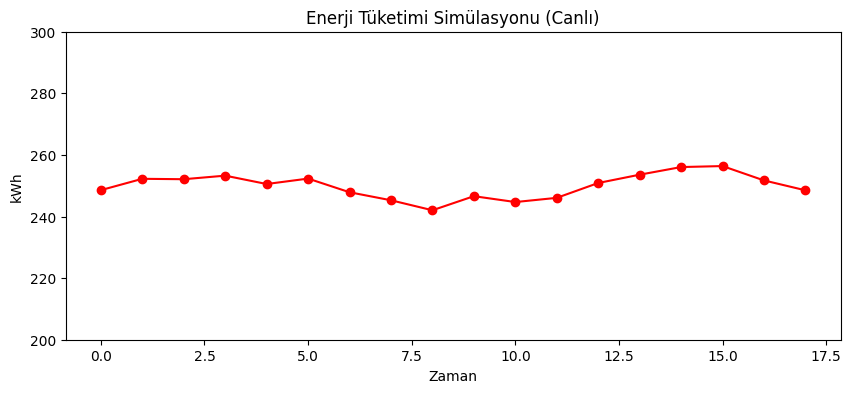

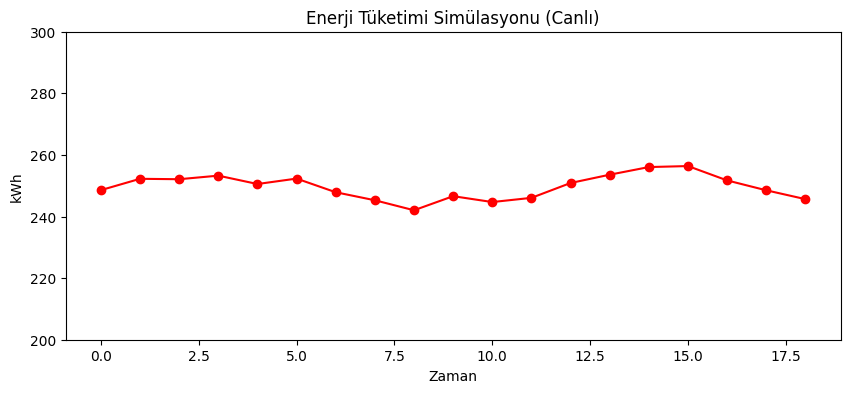

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

server = VirtualOPCUAServer()
energy_values = []

for _ in range(20):
    data = server.update_values()
    energy_values.append(data["Energy"])

    # Canlı grafik
    plt.figure(figsize=(10, 4))
    plt.plot(energy_values, color='red', marker='o')
    plt.title("Enerji Tüketimi Simülasyonu (Canlı)")
    plt.xlabel("Zaman")
    plt.ylabel("kWh")
    plt.ylim(200, 300)
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(1)
plt.close()

Colab'da Digital Twin Simülasyonu (ROS/Gazebo Olmadan)
Colab'da doğrudan ROS/Gazebo çalıştıramayız, ancak fizik tabanlı bir simülasyonla benzer sonuçlar elde edebiliriz.

1. Sanal Robot ve Enerji Modeli


In [ ]:
!pip install pydy matplotlib numpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class VirtualRobot:
    def __init__(self):
        self.position = 0
        self.velocity = 0
        self.power_consumption = 0

    def move(self, force, dt=0.1):
        mass = 5.0  # kg
        friction = 0.2
        self.velocity += (force - friction * self.velocity) / mass * dt
        self.position += self.velocity * dt
        self.power_consumption = 50 + 0.5 * abs(force * self.velocity)  # Enerji modeli
        return self.position, self.power_consumption

# Simülasyon
robot = VirtualRobot()
time_steps = np.arange(0, 10, 0.1)
positions = []
power_data = []

for t in time_steps:
    force = 10 * np.sin(t)  # Harmonik kuvvet
    pos, power = robot.move(force)
    positions.append(pos)
    power_data.append(power)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydy: filename=pydy-0.7.1-py3-none-any.whl size=5227160 sha256=105a812daf75287bc2b10eeda26d63ae3b6d845de226b0b63389bc8685addf02
  Stored in directory: /root/.cache/pip/wheels/3d/a7/37/ccc9d3b83eecc67060c013330a355354526044f3bbe5f42bba
Successfully built pydy


2. Gerçek Zamanlı Görselleştirme


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

def update(frame):
    ax1.clear()
    ax2.clear()

    ax1.plot(time_steps[:frame], positions[:frame], 'b')
    ax1.set_title('Robot Pozisyonu')

    ax2.plot(time_steps[:frame], power_data[:frame], 'r')
    ax2.set_title('Enerji Tüketimi (W)')

    plt.tight_layout()

ani = FuncAnimation(fig, update, frames=len(time_steps), interval=50)
plt.close()
from IPython.display import HTML
HTML(ani.to_jshtml())

<Figure size 640x480 with 0 Axes>

🤖 LSTM ile Enerji Tahmini (Colab'da Tam Çalışan Örnek)
1. Veri Hazırlama

In [ ]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Sanal veri oluşturma
X = np.column_stack((positions[:-1], power_data[:-1]))  # Girdi: pozisyon ve güç
y = power_data[1:]  # Çıktı: sonraki adım gücü

# Normalizasyon
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

# Zaman serisi veri seti
def create_sequences(data, targets, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(data)-seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(targets[i+seq_length])
    return torch.FloatTensor(X_seq), torch.FloatTensor(y_seq)

X_tensor, y_tensor = create_sequences(X_scaled, y_scaled)

<ipython-input-22-7e7081eef097>:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.FloatTensor(X_seq), torch.FloatTensor(y_seq)


2. LSTM Modeli ve Eğitim


In [ ]:
class PowerPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=32):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = PowerPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Eğitim döngüsü
for epoch in range(100):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

Epoch 0, Loss: 0.2505
Epoch 10, Loss: 0.0785
Epoch 20, Loss: 0.0405
Epoch 30, Loss: 0.0173
Epoch 40, Loss: 0.0120
Epoch 50, Loss: 0.0092
Epoch 60, Loss: 0.0073
Epoch 70, Loss: 0.0065
Epoch 80, Loss: 0.0054
Epoch 90, Loss: 0.0042


3. Tahmin ve Gerçek Değer Karşılaştırması


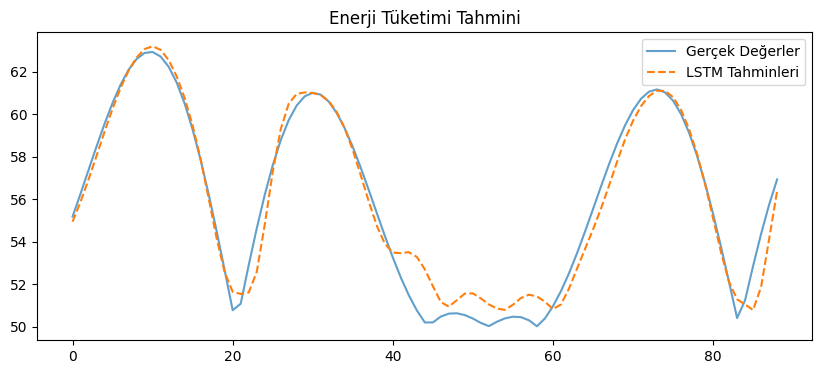

In [ ]:
with torch.no_grad():
    predictions = model(X_tensor).numpy()

# Geri ölçeklendirme
predictions_real = scaler.inverse_transform(predictions)
y_real = scaler.inverse_transform(y_tensor.numpy())

plt.figure(figsize=(10, 4))
plt.plot(y_real, label='Gerçek Değerler', alpha=0.7)
plt.plot(predictions_real, label='LSTM Tahminleri', linestyle='--')
plt.title('Enerji Tüketimi Tahmini')
plt.legend()
plt.show()

🚀 Entegre Çözüm: Simülasyon + LSTM


In [ ]:
# Simülasyondan canlı tahmin
test_sequence = X_tensor[-1].unsqueeze(0)  # Son 10 adımı al
next_power = model(test_sequence).item()
next_power_real = scaler.inverse_transform([[next_power]])[0][0]

print(f"Sonraki adım tahmini güç tüketimi: {next_power_real:.2f} W")

Sonraki adım tahmini güç tüketimi: 56.40 W
